### Linear Regression Model to Predict Future Year Prices (selecting from all features)
#### Read in all merged csv data files

In [1]:
import pandas as pd
import glob
import os
from sklearn.preprocessing import LabelEncoder

path = r'../data/curated/merged_dataset/' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in sorted(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
merged_df = pd.concat(li, axis=0, ignore_index=True)

# Rename the columns to facilitate to call them for later
merged_df.rename({'gdp(USD Millioins)': 'gdp', 'saving_rate(% of GDP)': 'saving_rate'}, axis=1, inplace=True)

ECON_COLS = ['saving_rate', 'population_density', 'income_per_person', 'crime_cases', 'gdp']

DIST_COLS = ['min_distance_to_prim', 'min_distance_to_poli', 'min_distance_to_park', 'min_distance_to_second', 'min_distance_to_hosp', 'min_distance_to_cbd', 
'min_distance_to_shop', 'min_distance_to_train']

INTERNAL_COLS = ['nbed', 'nbath', 'ncar', 'residence_type']

all_candidates = (DIST_COLS+INTERNAL_COLS).copy() # only select from distances

categorical_features = ['nbed', 'nbath', 'ncar', 'residence_type', 'sa2_2021']
le = LabelEncoder()

# Convert the categorical variables to numerical
for i in range(len(categorical_features)):
    new = le.fit_transform(merged_df[categorical_features[i]])
    merged_df[categorical_features[i]] = new


merged_df.drop(['address', 'latitude', 'longitude', 'postcode', 'sa2_2016'], axis=1, inplace=True)
merged_df.dropna(inplace=True)
merged_df

year  sa2_2021  residence_type  nbed  nbath  ncar  \
0       2013        61               1     1      0     0   
1       2013       102               1     1      0     0   
2       2013        61               1     1      0     0   
3       2013        23               1     5      2     0   
4       2013       209               0     0      0     0   
...      ...       ...             ...   ...    ...   ...   
172030  2022        89               1     3      0     1   
172031  2022       504               1     3      2     2   
172032  2022       190               1     1      2     1   
172033  2022       133               0     0      0     1   
172034  2022       149               0     0      0     1   

        min_distance_to_cbd  min_distance_to_park  min_distance_to_prim  \
0                 227.97163              23.16035               7.35747   
1                 223.66084               5.71742               6.50536   
2                 243.25680               5.11222               0.20027   
3                 140.35827              78.32509              10.66523   
4                  13.86135               0.93250               1.32931   
...                     ...                   ...                   ...   
172030            293.28053               0.56012               1.21809   
172031            258.29111               3.49087               5.08707   
172032              9.47077               2.45011               1.33931   
172033              1.84933               0.65199               1.10438   
172034              4.58626               0.48042               0.49588   

        min_distance_to_second  min_distance_to_train  min_distance_to_hosp  \
0                     16.96507               35.56825              21.35025   
1                      6.76794                7.54355               7.42972   
2                     36.72106               50.85341              36.63541   
3                     11.91899               11.26906             177.44731   
4                      3.49174                2.20800             177.44731   
...                        ...                    ...                   ...   
172030               114.77016               90.08591             140.56888   
172031                 3.60570                8.37185               2.60312   
172032                 1.62322                3.63291             140.56888   
172033                 1.27940                1.87840             140.56888   
172034                 1.47456                1.29233             140.56888   

        min_distance_to_poli  min_distance_to_shop  weekly_rent      gdp  \
0                   22.04660               9.35209        300.0  1536454   
1                    6.28177               9.35209        215.0  1536454   
2                    0.08478               9.35209        175.0  1536454   
3                   84.47341               9.35209        350.0  1536454   
4                   84.47341               3.96501        275.0  1536454   
...                      ...                   ...          ...      ...   
172030              74.35608              13.64920        265.0  3305754   
172031              74.35608              13.64920        500.0  3305754   
172032              74.35608               1.97636        750.0  3305754   
172033              74.35608              13.64920        409.0  3305754   
172034               1.38884              13.64920        365.0  3305754   

        saving_rate  income_per_person  population_density  crime_cases  
0          6.861393       39683.563449            2.172408         86.0  
1          6.861393       47222.702327            5.425503         36.0  
2          6.861393       39683.563449            2.172408         86.0  
3          6.861393       43556.283562          473.765281       1288.0  
4          6.861393       86103.411528         2834.210526       1923.0  
...             ...                ...                 ...          

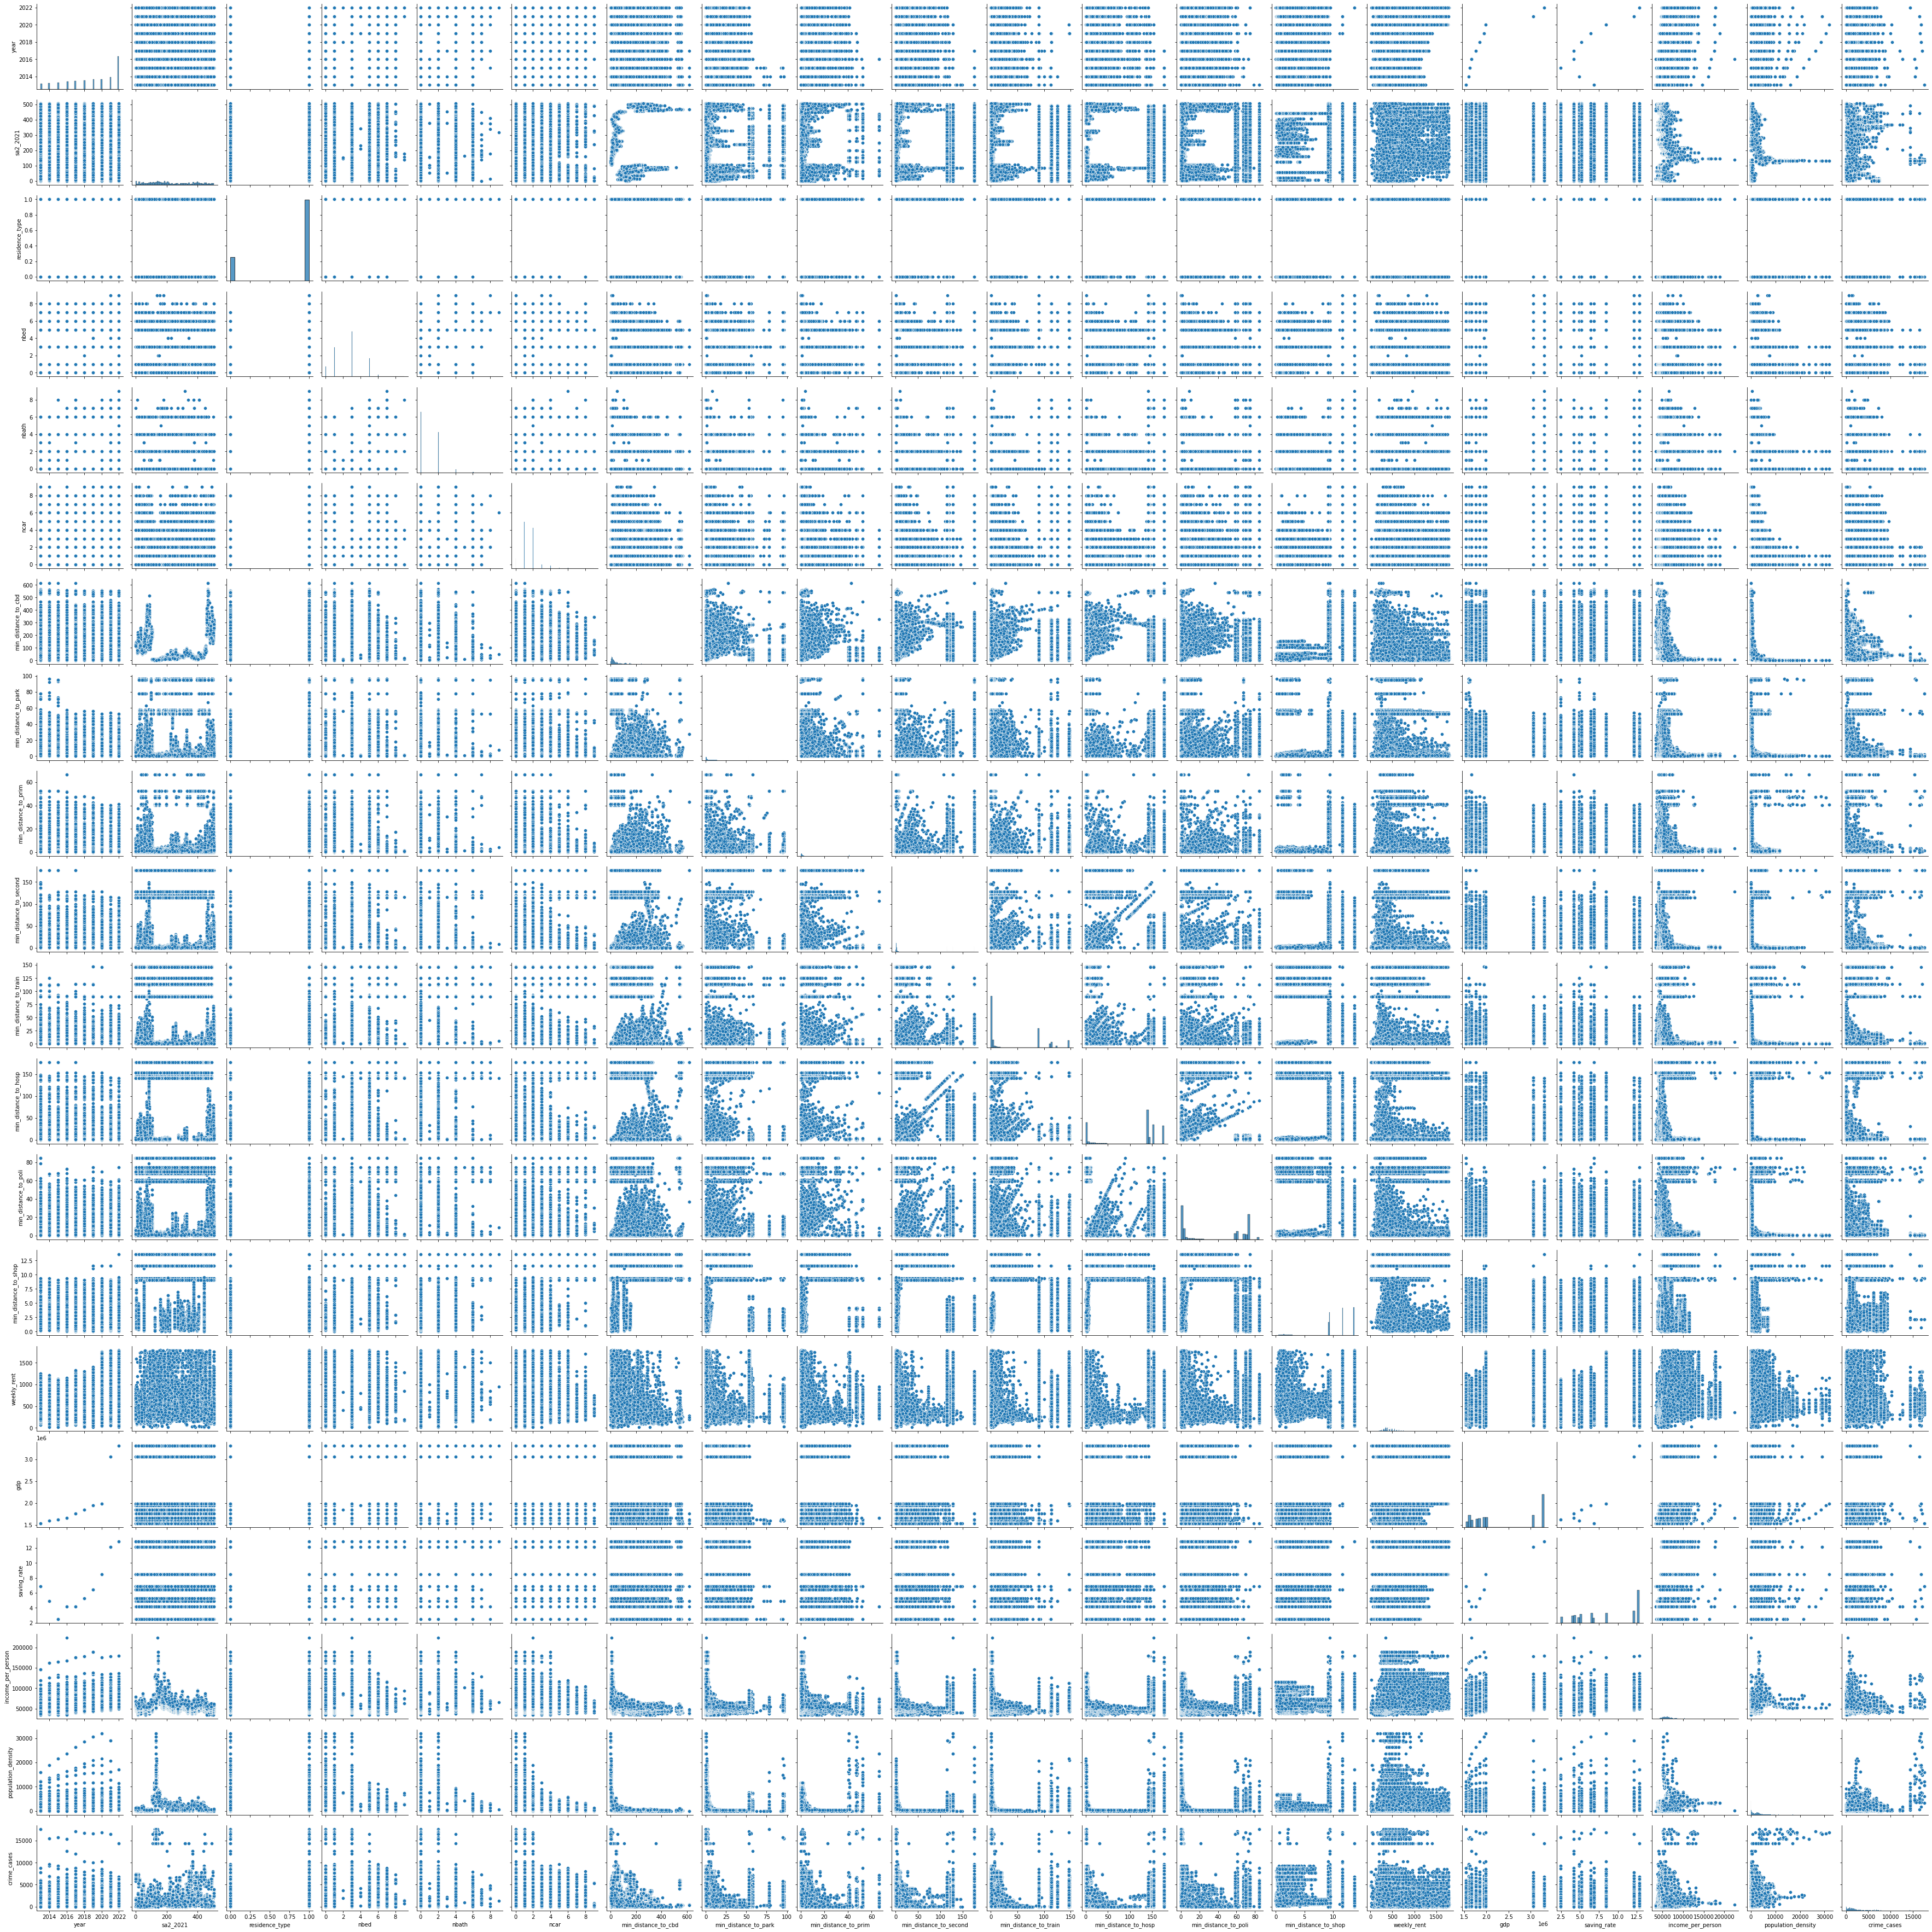

In [2]:
import seaborn as sns
sns.pairplot(merged_df)

### Log transformation provides better performance

In [3]:
import numpy as np

LOG_FEATURES = ['saving_rate', 'min_distance_to_prim', 
'min_distance_to_poli', 'min_distance_to_park', 'min_distance_to_second', 'min_distance_to_hosp', 'min_distance_to_cbd', 
'min_distance_to_shop', 'population_density', 'income_per_person', 
'crime_cases', 'min_distance_to_train', 'gdp']
for log_feature in LOG_FEATURES:
    merged_df[log_feature] = np.log(merged_df[log_feature])

In [4]:
print(merged_df.columns)

y = np.log(merged_df['weekly_rent'])
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(merged_df.isna().sum())
X = merged_df.drop(['weekly_rent'], axis=1)
X

Index(['year', 'sa2_2021', 'residence_type', 'nbed', 'nbath', 'ncar',
       'min_distance_to_cbd', 'min_distance_to_park', 'min_distance_to_prim',
       'min_distance_to_second', 'min_distance_to_train',
       'min_distance_to_hosp', 'min_distance_to_poli', 'min_distance_to_shop',
       'weekly_rent', 'gdp', 'saving_rate', 'income_per_person',
       'population_density', 'crime_cases'],
      dtype='object')


year  sa2_2021  residence_type  nbed  nbath  ncar  \
0       2013        61               1     1      0     0   
1       2013       102               1     1      0     0   
2       2013        61               1     1      0     0   
3       2013        23               1     5      2     0   
4       2013       209               0     0      0     0   
...      ...       ...             ...   ...    ...   ...   
172030  2022        89               1     3      0     1   
172031  2022       504               1     3      2     2   
172032  2022       190               1     1      2     1   
172033  2022       133               0     0      0     1   
172034  2022       149               0     0      0     1   

        min_distance_to_cbd  min_distance_to_park  min_distance_to_prim  \
0                  5.429221              3.142442              1.995716   
1                  5.410131              1.743518              1.872626   
2                  5.494118              1.631634             -1.608089   
3                  4.944198              4.360868              2.366989   
4                  2.629104             -0.069886              0.284660   
...                     ...                   ...                   ...   
172030             5.681130             -0.579604              0.197284   
172031             5.554087              1.250151              1.626702   
172032             2.248210              0.896133              0.292155   
172033             0.614823             -0.427726              0.099284   
172034             1.523065             -0.733095             -0.701421   

        min_distance_to_second  min_distance_to_train  min_distance_to_hosp  \
0                     2.831157               3.571453              3.061063   
1                     1.912197               2.020693              2.005488   
2                     3.603350               3.928947              3.601015   
3                     2.478133               2.422061              5.178674   
4                     1.250400               0.792087              5.178674   
...                        ...                    ...                   ...   
172030                4.742932               4.500764              4.945698   
172031                1.282516               2.124875              0.956711   
172032                0.484412               1.290034              4.945698   
172033                0.246391               0.630420              4.945698   
172034                0.388360               0.256447              4.945698   

        min_distance_to_poli  min_distance_to_shop        gdp  saving_rate  \
0                   3.093158              2.235600  14.244988     1.925910   
1                   1.837652              2.235600  14.244988     1.925910   
2                  -2.467696              2.235600  14.244988     1.925910   
3                   4.436437              2.235600  14.244988     1.925910   
4                   4.436437              1.377508  14.244988     1.925910   
...                      ...                   ...        ...          ...   
172030              4.308865              2.613681  15.011175     2.552487   
172031              4.308865              2.613681  15.011175     2.552487   
172032              4.308865              0.681257  15.011175     2.552487   
172033              4.308865              2.613681  15.011175     2.552487   
172034              0.328469              2.613681  15.011175     2.552487   

        income_per_person  population_density  crime_cases  
0               10.588692            0.775836     4.454347  
1               10.762630            1.691111     3.583519  
2               10.588692            0.775836     4.454347  
3               10.681809            6.160712     7.160846  
4               11.363304            7.949519     7.561642  
...                   ...                 ...          ...  
172030          10.903481            5.996452     5.638355  


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)
null_X = X_train.drop(DIST_COLS+INTERNAL_COLS, axis=1) # By default, all categorical variables are used, plus economic factors
X_train

year  sa2_2021  residence_type  nbed  nbath  ncar  \
124865  2022        59               1     3      0     1   
104159  2021        21               1     5      2     4   
11046   2014       157               1     5      0     3   
67719   2019       220               1     1      0     1   
25343   2015        81               1     5      2     2   
...      ...       ...             ...   ...    ...   ...   
119894  2022       262               0     1      0     1   
103709  2021       488               1     1      0     1   
131947  2022       290               1     3      2     2   
146884  2022        42               1     3      0     1   
121973  2022       388               1     3      2     1   

        min_distance_to_cbd  min_distance_to_park  min_distance_to_prim  \
124865             5.031447              2.899481             -1.247716   
104159             5.046102              1.404505              0.859356   
11046              2.890546              0.069731              0.343100   
67719              2.335963              0.609744             -0.065104   
25343              4.576933             -0.621199              1.368695   
...                     ...                   ...                   ...   
119894             2.625978             -1.147403              0.092953   
103709             5.299019             -0.265621             -1.791080   
131947             3.587618             -0.562996              0.619802   
146884             4.129493             -2.575313             -1.160466   
121973             3.014413             -0.576841             -2.376662   

        min_distance_to_second  min_distance_to_train  min_distance_to_hosp  \
124865               -0.542936               0.133569              4.945698   
104159                1.009347               4.498420              4.955256   
11046                 5.171704               0.254851              5.178674   
67719                 0.252065               0.385371             -0.530994   
25343                 3.024279               2.620736              5.178674   
...                        ...                    ...                   ...   
119894                4.742932               0.767679              4.945698   
103709                2.978110              -0.736535              4.955256   
131947                4.742932               4.500764              4.945698   
146884                1.256692               1.113576              4.945698   
121973               -0.760741               0.787589              4.945698   

        min_distance_to_poli  min_distance_to_shop        gdp  saving_rate  \
124865             -0.046096              2.613681  15.011175     2.552487   
104159              4.071938              2.448185  14.934864     2.495269   
11046               0.683693              2.239161  14.284609     1.591557   
67719               0.707834              1.024819  14.481404     1.860349   
25343               2.917580              2.210610  14.299914     0.915286   
...                      ...                   ...        ...          ...   
119894              1.000305              2.613681  15.011175     2.552487   
103709              3.687179              2.448185  14.934864     2.495269   
131947              4.308865              2.613681  15.011175     2.552487   
146884             -0.059060              2.613681  15.011175     2.552487   
121973              4.308865              2.613681  15.011175     2.552487   

        income_per_person  population_density  crime_cases  
124865          10.865016            5.736572     5.575949  
104159          11.046034            6.702363     8.669399  
11046           11.311910            7.953820     6.741701  
67719           11.024015            7.938812     8.597297  
25343           10.763672            3.877594     5.337538  
...                   ...                 ...          ...  
119894          11.012297            7.711549     7.681560  


#### Prepare a null model that uses only Year, SA2 code, Residence Type and Economic Factors to predict weekly rent

In [6]:
null_X

year  sa2_2021        gdp  saving_rate  income_per_person  \
124865  2022        59  15.011175     2.552487          10.865016   
104159  2021        21  14.934864     2.495269          11.046034   
11046   2014       157  14.284609     1.591557          11.311910   
67719   2019       220  14.481404     1.860349          11.024015   
25343   2015        81  14.299914     0.915286          10.763672   
...      ...       ...        ...          ...                ...   
119894  2022       262  15.011175     2.552487          11.012297   
103709  2021       488  14.934864     2.495269          10.890610   
131947  2022       290  15.011175     2.552487          11.145947   
146884  2022        42  15.011175     2.552487          11.123590   
121973  2022       388  15.011175     2.552487          10.918975   

        population_density  crime_cases  
124865            5.736572     5.575949  
104159            6.702363     8.669399  
11046             7.953820     6.741701  
67719             7.938812     8.597297  
25343             3.877594     5.337538  
...                    ...          ...  
119894            7.711549     7.681560  
103709            1.335181     4.709530  
131947            7.714677     7.172425  
146884            5.958425     6.703188  
121973            7.474772     8.604105  

[120412 rows x 7 columns]

In [7]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

null_model = sm.OLS(y_train, null_X).fit()
# Summary of all factors
null_summary = null_model.summary()

In [8]:
print(null_summary)
print(f'AIC = {null_model.aic}')

                                 OLS Regression Results                                
Dep. Variable:            weekly_rent   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          5.872e+06
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                        0.00
Time:                        20:17:21   Log-Likelihood:                         -36053.
No. Observations:              120412   AIC:                                  7.212e+04
Df Residuals:                  120405   BIC:                                  7.219e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

#### (All Features) Forward Selection - to add the most useful predictor that gives the lowest AIC at each iteration

In [9]:
AIC_dict = {}
last_min = null_model.aic
candidates = []

while(True):
    for x in all_candidates:
        print(f"trying feature {x}")
        new_X = X_train[x]
        forward_X = pd.concat([new_X, null_X], axis=1)
        model = sm.OLS(y_train, forward_X).fit()
        AIC_dict[x] = model.aic
        print(f"AIC = {model.aic}")

    min_aic =  min(AIC_dict.values())
    min_aic_key = min(AIC_dict, key=AIC_dict.get)

    if min_aic < last_min:
        candidates.append(min_aic_key)
        all_candidates.remove(min_aic_key)
        last_min = min_aic
        null_X = pd.concat([X_train[min_aic_key], null_X], axis=1)

        print('step: ' + str(len(candidates)))
        print(candidates)
        print('new AIC: ' + str(min_aic))
        print('===============')
    else:
        model = sm.OLS(y_train, null_X).fit()
        print(model.summary())
        break

trying feature min_distance_to_prim
AIC = 71025.2874090895
trying feature min_distance_to_poli
AIC = 71871.83716224559
trying feature min_distance_to_park
AIC = 71970.7257015467
trying feature min_distance_to_second
AIC = 71795.60141064227
trying feature min_distance_to_hosp
AIC = 71716.56504542456
trying feature min_distance_to_cbd
AIC = 71569.1267781345
trying feature min_distance_to_shop
AIC = 72066.30662779731
trying feature min_distance_to_train
AIC = 70712.43903629307
trying feature nbed
AIC = 33134.81043185049
trying feature nbath
AIC = 40200.889478093246
trying feature ncar
AIC = 63005.18240970385
trying feature residence_type
AIC = 51462.211354710395
step: 1
['nbed']
new AIC: 33134.81043185049
trying feature min_distance_to_prim
AIC = 32606.489235778048
trying feature min_distance_to_poli
AIC = 32754.415699295932
trying feature min_distance_to_park
AIC = 33103.010370986245
trying feature min_distance_to_second
AIC = 33103.35539299762
trying feature min_distance_to_hosp
AIC = 3

#### If standardise is required, check this out https://www.youtube.com/watch?v=QH_elD_JKuc&list=PLe9UEU4oeAuV7RtCbL76hca5ELO_IELk4&index=10

In [10]:
SELECTED_FEATURES = set(candidates)
print(sorted(SELECTED_FEATURES))
drop = list(set(DIST_COLS).union(set(INTERNAL_COLS)) - SELECTED_FEATURES)

['min_distance_to_cbd', 'min_distance_to_hosp', 'min_distance_to_park', 'min_distance_to_poli', 'min_distance_to_prim', 'min_distance_to_shop', 'min_distance_to_train', 'nbath', 'nbed', 'ncar', 'residence_type']


In [11]:
final_model = sm.OLS(y_train, X_train.drop(drop, axis=1)).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            weekly_rent   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          3.647e+06
Date:                Sun, 09 Oct 2022   Prob (F-statistic):                        0.00
Time:                        20:17:36   Log-Likelihood:                         -7922.3
No. Observations:              120412   AIC:                                  1.588e+04
Df Residuals:                  120394   BIC:                                  1.606e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
year                  -9.748e-05   4.55e-05     -2.144      0.032      -0.000   -8.35e-06
sa2_2021               -8.17e-05   5.32e-06    -15.359      0.000   -9.21e-05   -7.13e-05
residence_type            0.1005      0.002     42.102      0.000       0.096       0.105
nbed                      0.0693      0.001    101.523      0.000       0.068       0.071
nbath                     0.0708      0.001     87.593      0.000       0.069       0.072
ncar                      0.0216      0.001     24.159      0.000       0.020       0.023
min_distance_to_cbd      -0.0823      0.001    -79.987      0.000      -0.084      -0.080
min_distance_to_park     -0.0068      0.001    -12.703      0.000      -0.008      -0.006
min_distance_to_prim      0.0139      0.001     18.644      0.000       0.012       0.015
min_distance_to_train     0.0021      0.000      5.459      0.000       0.001       0.003
min_distance_to_hosp     -0.0055      0.000    -12.483      0.000      -0.006      -0.005
min_distance_to_poli     -0.0096      0.000    -21.840      0.000      -0.010      -0.009
min_distance_to_shop     -0.0085      0.001     -7.377      0.000      -0.011      -0.006
gdp                       0.1062      0.006     17.728      0.000       0.094       0.118
saving_rate               0.0392      0.003     11.723      0.000       0.033       0.046
income_per_person         0.4151      0.004     97.902      0.000       0.407       0.423
population_density        0.0365      0.001     50.834      0.000       0.035       0.038
crime_cases              -0.0328      0.001    -42.988      0.000      -0.034      -0.031
==============================================================================
Omnibus:                    47262.862   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           639605.450
Skew:                           1.515   Prob(JB):                         0.00
Kurtosis:                      13.877   Cond. No.                     1.84e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
import numpy as np
predictions = final_model.predict(X_test.drop(drop, axis=1))
errors = np.array(predictions - y_test)
squared_errors = errors**2
mean_squared_error = squared_errors.mean()

print(f'MSE: {mean_squared_error}')

tot_sum_squares = (np.array(y_test - y_test.mean())**2).sum()
r2 = 1 - (squared_errors.sum() / tot_sum_squares)
print(f'Model R^2: {r2:.4f}')

MSE: 0.0661339504201723
Model R^2: 0.5442


In [13]:
#lm = sm.OLS(y, X.drop(['min_distance_to_park', 'min_distance_to_second'], axis=1)).fit()

In [14]:
#import pickle
#pickle.dump(lm, open('../web/models/lr_rental_model.pkl','wb'))
#model = pickle.load(open('../web/models/lr_rental_model.pkl','rb'))